In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install streamlit



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import streamlit as st

In [3]:
df = pd.read_excel("/content/Clean_data_PCA.xlsx")

In [4]:
df.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,104446,467.0,829.0,243504.0,3.556251e+13,16255,109.795706,17.662883,28.0,41.0,...,17400892.0,14644405.0,7682779.0,20806551.0,519620584.0,2710989.0,318297673.0,3820483.0,43336429.0,556406594.0
1,104450,641.0,444.0,236570.0,3.530731e+13,12443,46.000000,7.000000,46.0,46.0,...,19431593.0,16964908.0,11758420.0,9907089.0,715350506.0,10250922.0,290582586.0,1716480.0,40719212.0,757526492.0
2,104466,804.0,199.0,231780.0,3.520031e+13,26535,109.795706,17.662883,23.0,51.0,...,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
3,104468,676.0,176.0,230839.0,8.636750e+13,12453,39.000000,2.000000,22.0,46.0,...,3334865.0,14454366.0,17917894.0,1530332.0,293492651.0,1362536.0,495376623.0,11684759.0,30713366.0,329159454.0
4,34855,810.0,294.0,238915.0,3.586111e+13,12443,38.000000,1.000000,49.0,47.0,...,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0


In [5]:
# splitting the data into the columns which need to be trained(X) and the target column(y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
# Model
X = df.drop('Handset Manufacturer', axis=1)
y = df['Handset Manufacturer']

In [5]:
!pip install scikit-learn


In [6]:
# splitting data into training and testing data with 30 % of data as testing data respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99971, 50), (42846, 50), (99971,), (42846,))

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


In [10]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# predicting on the test dataset
y_pred = classifier.predict(X_test)


In [12]:
y_pred

array([103,  52, 103, ..., 103,   5,   5])

In [13]:
# finding out the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)


In [14]:
score

0.9733930822013723

# We get an accuracy of 97% which is pretty good.


In [15]:
# importing the random forest classifier model and training it on the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


In [16]:
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [17]:
# predicting on the test dataset
y_pred = classifier.predict(X_test)


In [18]:
y_pred

array([103,  52, 103, ..., 103,   5,   5])

In [19]:
# finding out the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)


In [22]:
score

0.9820520001867152

# We get an accuracy of 98% which is pretty good.


In [25]:
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from PIL import Image



In [31]:
pickle_in = open('/content/Clean_data_PCA.xlsx')

In [34]:
a1,a2 = st.columns(2)

2024-09-11 08:50:03.426 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-11 08:50:03.431 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-11 08:50:03.434 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [52]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import pydeck as pdk
import plotly.express as px
st.write('Hello world!')
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


2024-09-11 09:07:04.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-11 09:07:04.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-11 09:07:04.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-11 09:07:04.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [53]:
st.set_page_config(layout="wide")

2024-09-11 09:07:47.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [54]:
Satisfaction = pd.read_excel('/content/Task_001_data.xlsx')

In [55]:
st.write

<bound method WriteMixin.write of DeltaGenerator()>

In [56]:
top_3_manufacturers = Satisfaction.groupby('Handset Manufacturer')['MSISDN/Number'].count().sort_values(ascending=False).head(3)

In [57]:
top_3_manufacturers

,MSISDN/Number
Handset Manufacturer,
Apple,58051
Samsung,37540
Huawei,33447


In [58]:
top_10_handset_type = Satisfaction.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(10)

In [59]:
top_10_handset_type

,MSISDN/Number
Handset Type,
Huawei B528S-23A,19951
Apple iPhone 6S (A1688),8985
Apple iPhone 6 (A1586),8773
undefined,8255
Apple iPhone 7 (A1778),6166
Apple iPhone Se (A1723),4951
Apple iPhone 8 (A1905),4841
Apple iPhone Xr (A2105),4388
Samsung Galaxy S8 (Sm-G950F),4261


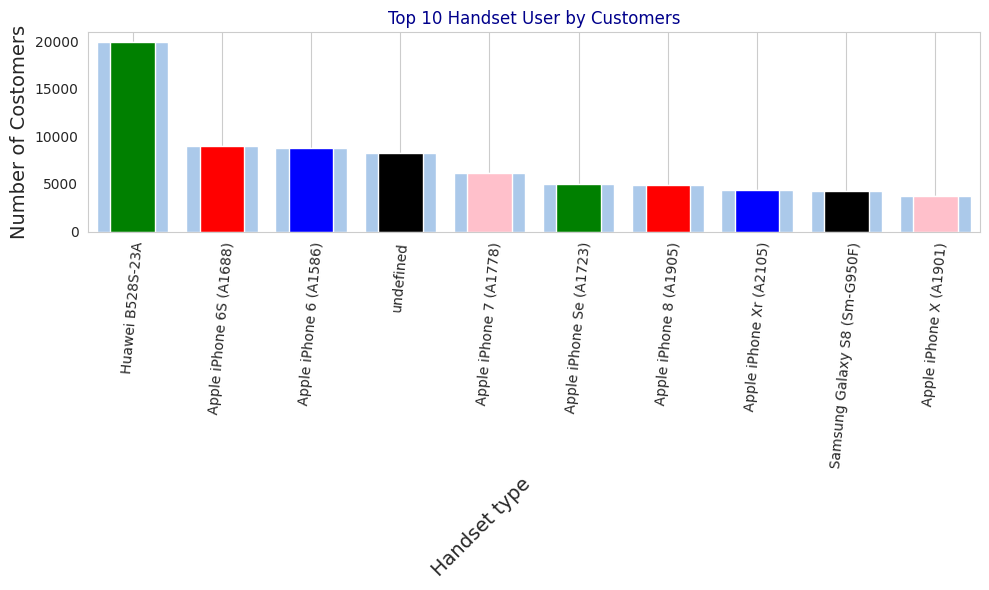

In [60]:
# bar plot of the Top 10 Handsets
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the top 10 handsets
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handset_type.index, y=top_10_handset_type.values)
plt.xlabel("Handset Type")
plt.ylabel("Count")
# costomize the plot
top_10_handset_type.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("Top 10 Handset User by Customers", color= 'darkblue')
plt.xlabel('Handset type',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [61]:
# Identify the Top 5 handSet User by Customers
handset_count = Satisfaction['Handset Type'].value_counts()
#Identify the top 5 handset
top_5_handsets = handset_count.head(5)
print("Top 5 handset User by Costumer")
print(top_5_handsets)


Top 5 handset User by Costumer
Handset Type
Huawei B528S-23A           19951
Apple iPhone 6S (A1688)     8985
Apple iPhone 6 (A1586)      8773
undefined                   8255
Apple iPhone 7 (A1778)      6166
Name: count, dtype: int64


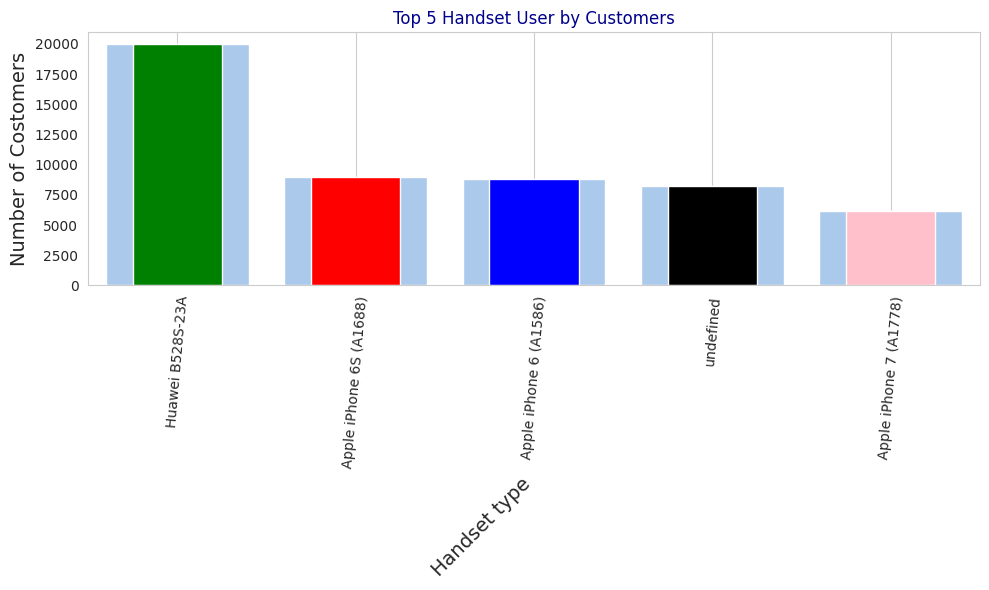

In [62]:
# bar plot of the Top 5 Handsets
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the top 5 handsets
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_handsets.index, y=top_5_handsets.values)
plt.xlabel("Handset Type")
plt.ylabel("Count")
# costomize the plot
top_5_handsets.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("Top 5 Handset User by Customers", color= 'darkblue')
plt.xlabel('Handset type',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

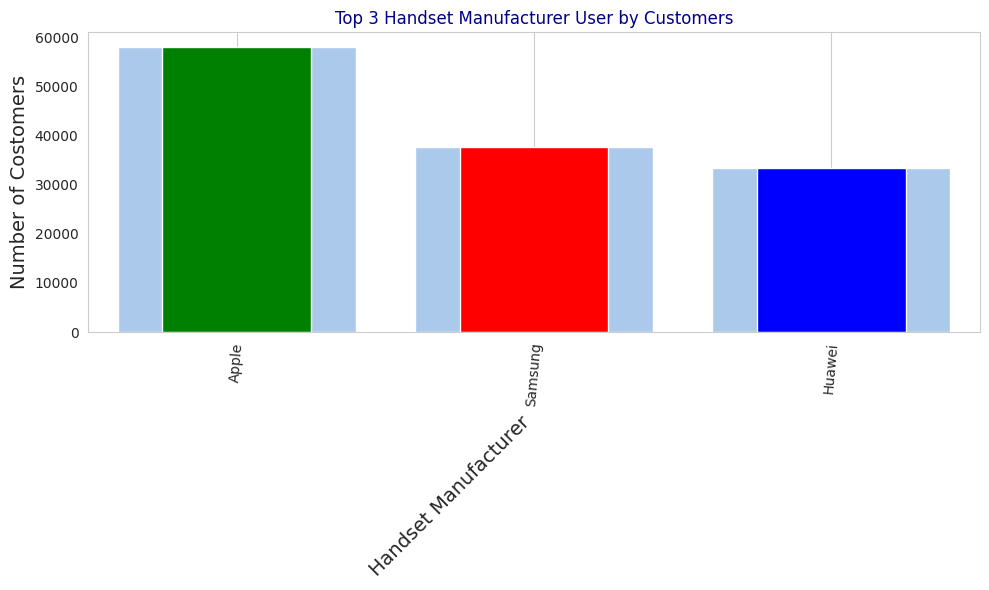

In [63]:
# bar plot of the Top 3 Handset Manufacturer
# set the style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")
# plot the top 3 handsets
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.xlabel("Handset Manufacturer")
plt.ylabel("Count")
# costomize the plot
top_3_manufacturers.plot(kind='bar',color =['green','red','blue','black','pink'])
plt.xticks(rotation = 85)
plt.title("Top 3 Handset Manufacturer User by Customers", color= 'darkblue')
plt.xlabel('Handset Manufacturer',fontsize = 14, rotation=45,ha = 'right')
plt.ylabel('Number of Costomers',fontsize = 14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Handsets')

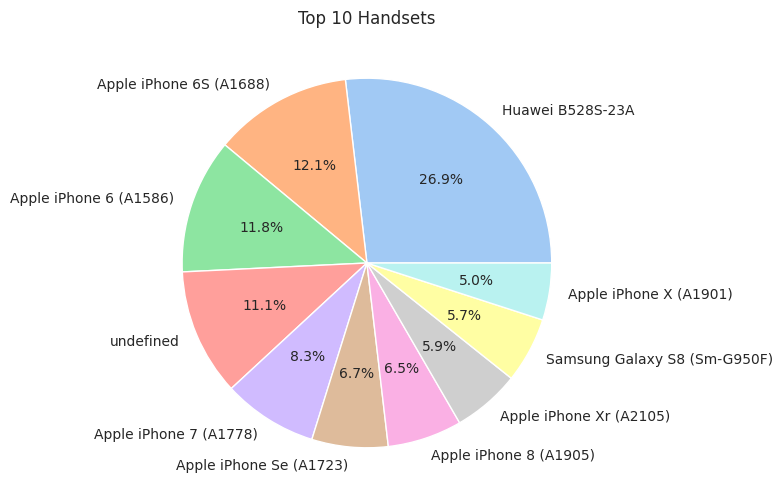

In [64]:
# Show the pie plot
plt.figure(figsize=(10, 6))
plt.pie(x=top_10_handset_type.values, labels=top_10_handset_type.index, autopct='%1.1f%%')
plt.title('Top 10 Handsets')

Text(0.5, 1.0, 'Top 5 Handsets')

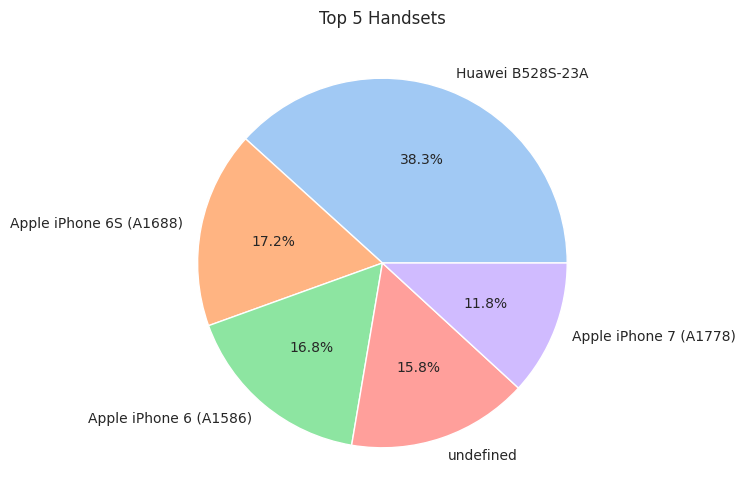

In [65]:
# Show the pie plot
plt.figure(figsize=(10, 6))
plt.pie(x=top_5_handsets.values, labels=top_5_handsets.index, autopct='%1.1f%%')
plt.title('Top 5 Handsets')

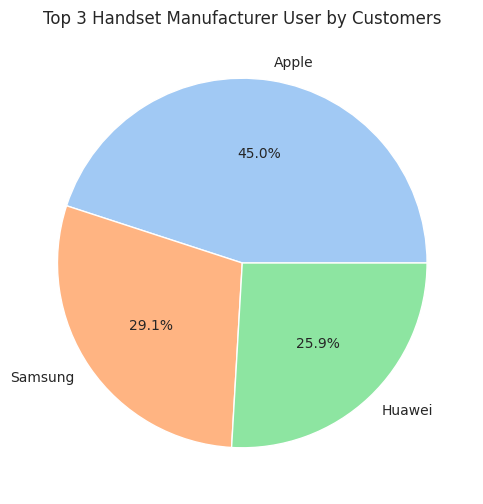

In [66]:
# show the pie plot
plt.figure(figsize=(10, 6))
plt.pie(x=top_3_manufacturers.values, labels=top_3_manufacturers.index, autopct='%1.1f%%')
plt.title('Top 3 Handset Manufacturer User by Customers')
plt.show()

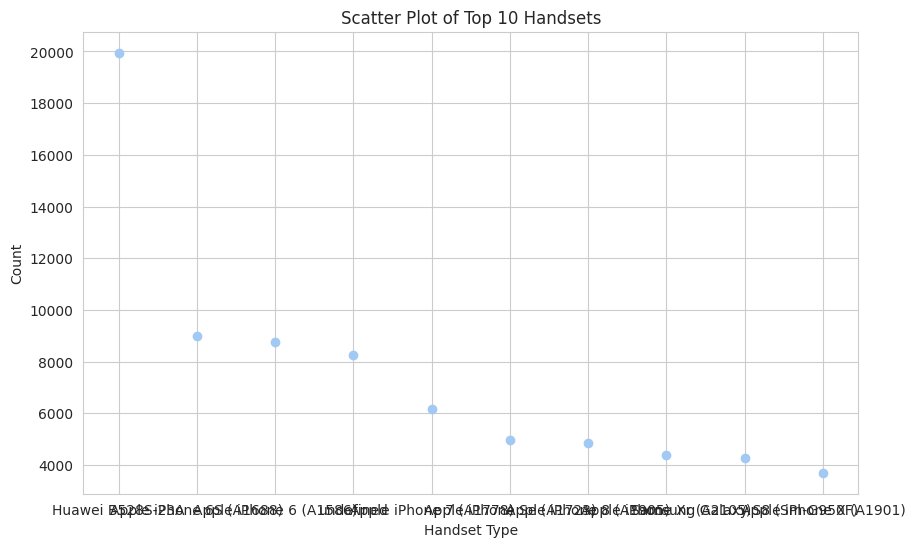

In [67]:
# Show the scetter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=top_10_handset_type.index, y=top_10_handset_type.values)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Scatter Plot of Top 10 Handsets')
plt.show()


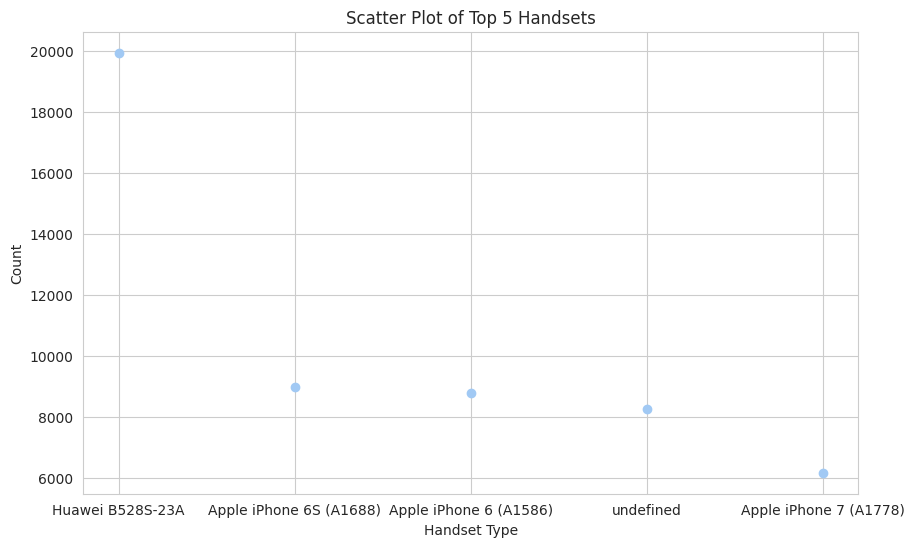

In [68]:
# Show the scetter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=top_5_handsets.index, y=top_5_handsets.values)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Scatter Plot of Top 5 Handsets')
plt.show()


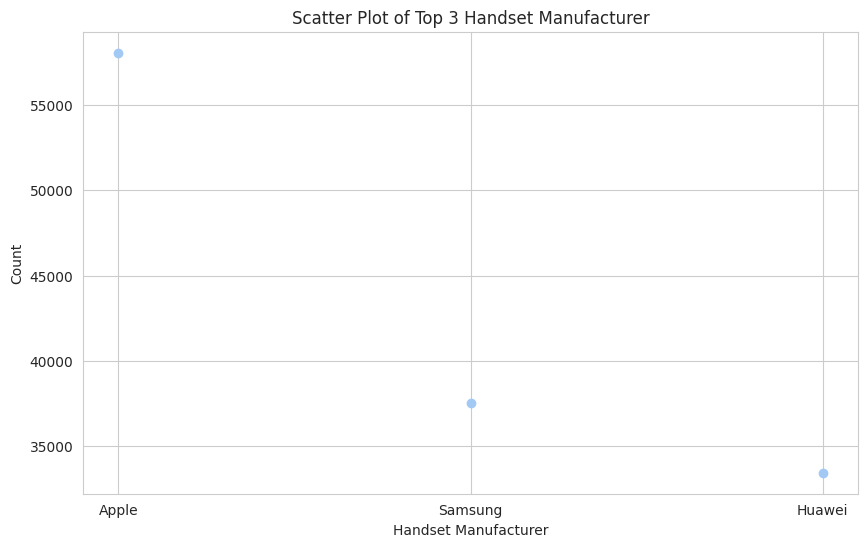

In [69]:
# Show the scetter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Scatter Plot of Top 3 Handset Manufacturer')
plt.show()


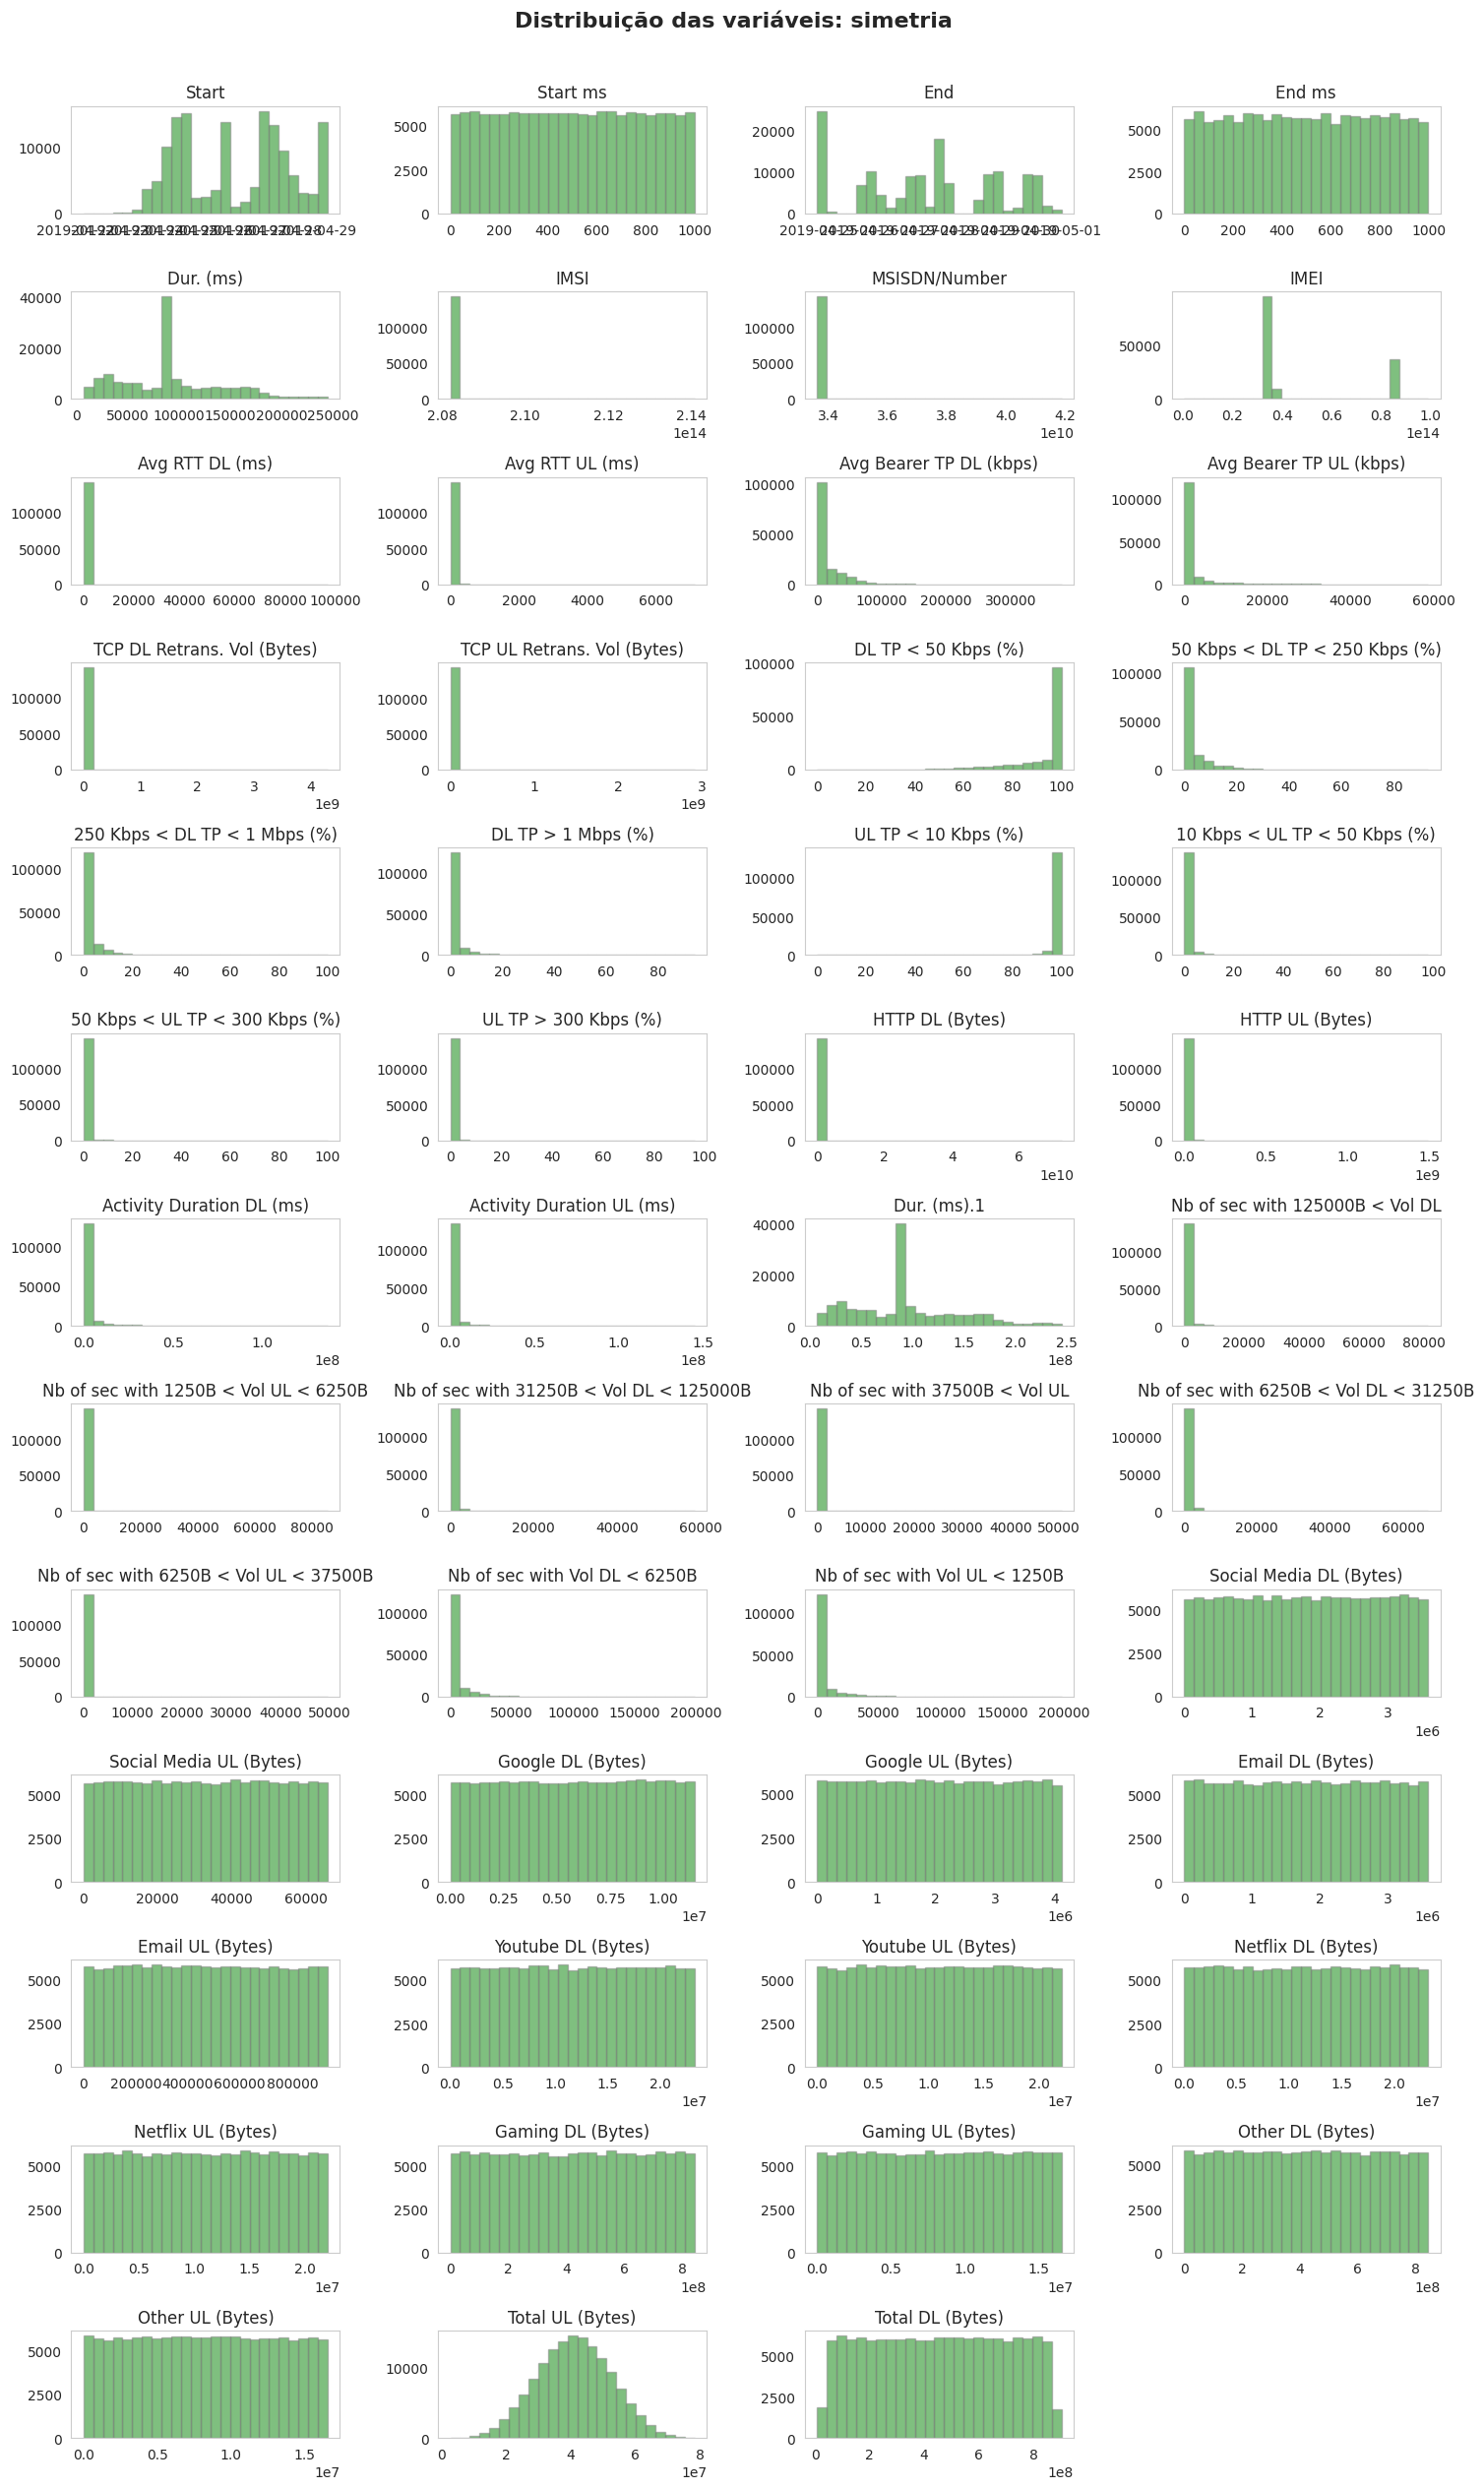

In [70]:
Satisfaction.hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="gray", color = 'green', alpha = 0.5, grid = False)
plt.suptitle('Distribuição das variáveis: simetria', y = 1.01, fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

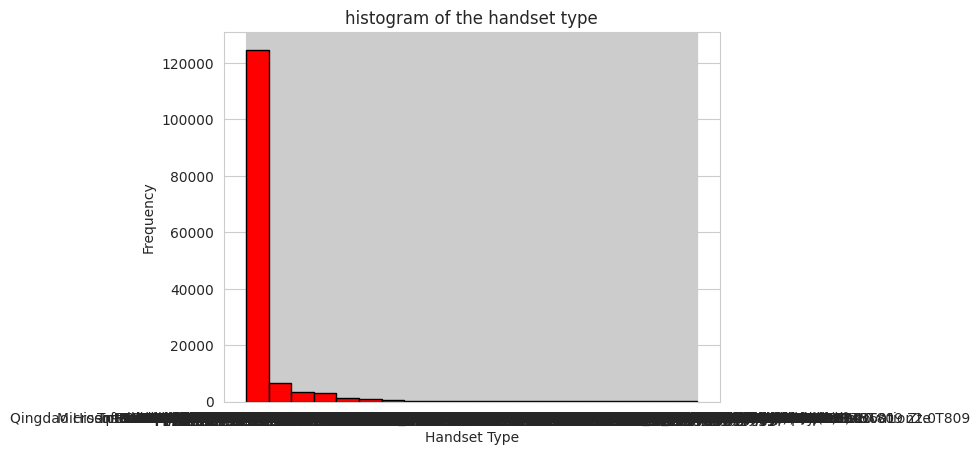

In [71]:
# Histogram for the top 10 handset
plt.hist(Satisfaction['Handset Type'], bins = 20, color = 'red', edgecolor = 'black')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
plt.title('histogram of the handset type')
plt.show()

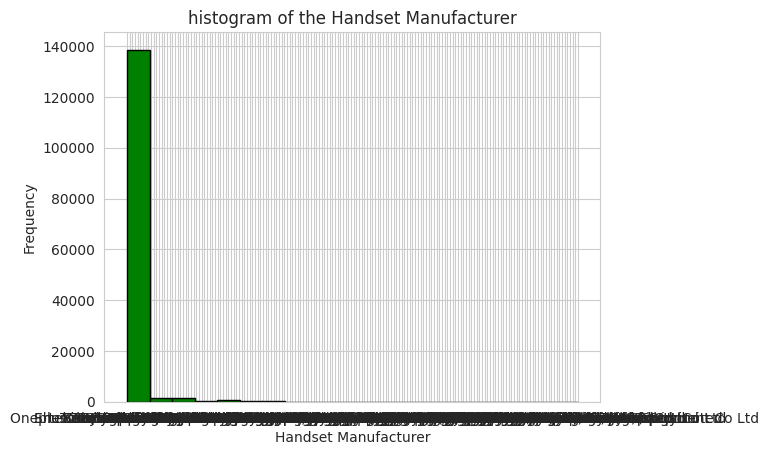

In [72]:
# Histogram for the top 3 handset
plt.hist(Satisfaction['Handset Manufacturer'], bins = 20, color = 'green', edgecolor = 'black')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Frequency')
plt.title('histogram of the Handset Manufacturer')
plt.show()

In [74]:
PCA_df = pd.read_excel('/content/Task_002_data.xlsx')

In [75]:
# distributing the df into two components X and Y
X = PCA_df.drop(['Dur. (ms)'], axis=1)
y = PCA_df['Dur. (ms)']

In [76]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [78]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [80]:
# use algoritham KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


In [81]:
classifier = KNeighborsClassifier()

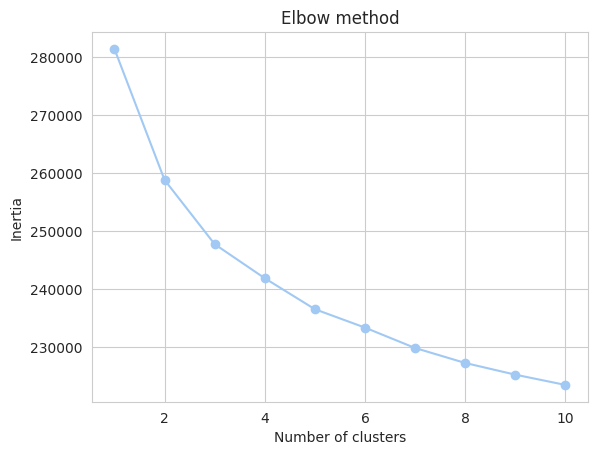

In [82]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(PCA_df)
clusters = kmeans.predict(PCA_df)
silhouette_score(PCA_df, clusters)


0.08432702467669109

In [84]:
# Fitting K-mean algoritham To the training set
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)


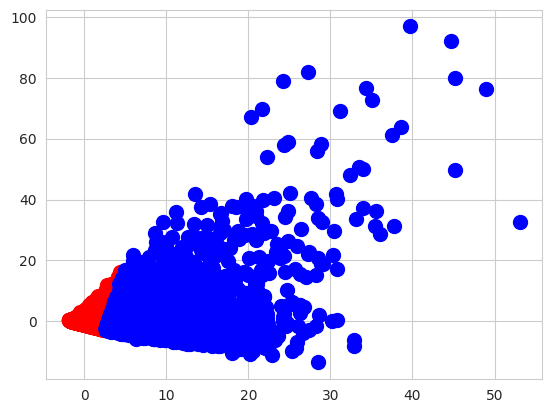

In [85]:
#plot K-means  sctter plot and culaster
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [87]:
# Select the numerical columns for PCA
numerical_columns = PCA_df.select_dtypes(include=['float64', 'int64']).columns

# Perform Min-Max scaling on the numerical columns
scaler = MinMaxScaler()
PCA_df[numerical_columns] = scaler.fit_transform(PCA_df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
PCA_df_pca = pca.fit_transform(PCA_df[numerical_columns])

# Create a new DataFrame with the PCA components
PCA_df_pca = pd.DataFrame(PCA_df_pca, columns=['PC1', 'PC2'])

print(PCA_df_pca.head())

        PC1       PC2
0  0.506703 -0.147763
1 -0.296536 -0.504960
2  0.528603  0.515060
3  0.060684  0.200714
4 -0.327599 -0.165152


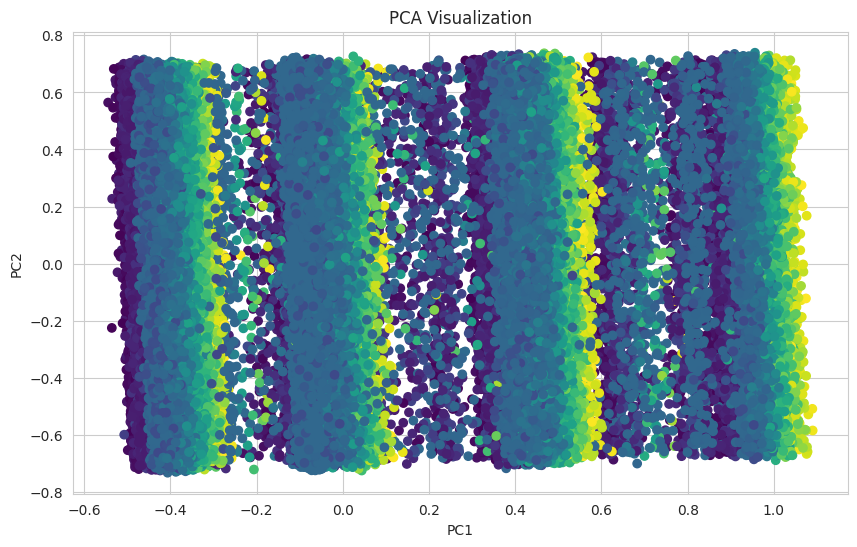

In [88]:
# Visualization of PCA : PC1 values represented by color
plt.figure(figsize=(10, 6))
plt.scatter(PCA_df_pca['PC1'], PCA_df_pca['PC2'], c=PCA_df['Dur. (ms)'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

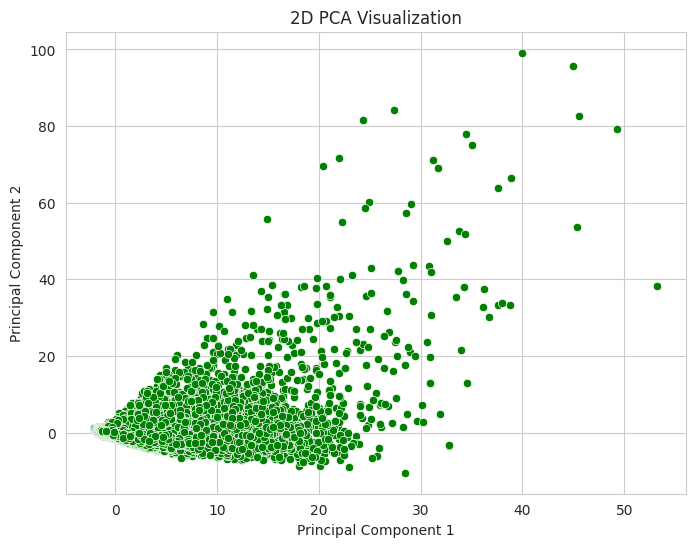

In [89]:
df = pd.DataFrame(PCA_df)

# Step 1: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

#  Plot the 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color ='green')
plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

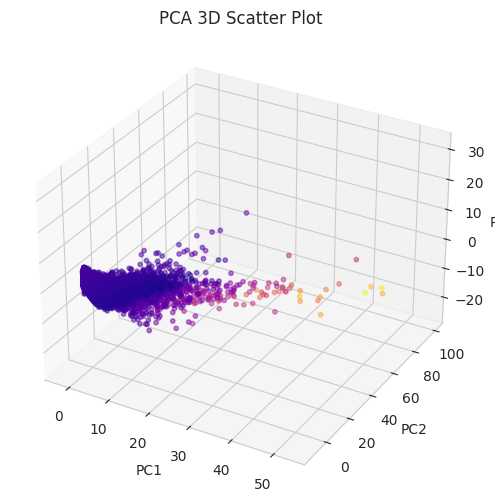

In [90]:
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA to reduse to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA components
PCA_df_pca = pd
## 3D Scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 1], alpha = 0.5, s=10, cmap='plasma') # Copy by PC2
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Scatter Plot')
plt.show()


In [91]:
# Export the DataFrame to an Excel file
df.to_excel('Task_004_data.xlsx', index=False)

In [94]:
from google.colab import files
files.download('Task_004_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>